In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_squad= pd.read_csv("Scrape_output/Full_squad.csv")
df_squad = df_squad.drop('Unnamed: 0',axis=1)
df_squad = df_squad.drop('minutes_per_game_gk',axis=1)
df_squad = df_squad.drop('save_perc_gk',axis=1)
df_squad = df_squad.drop('goals_against_per90_gk',axis=1)
df_squad = df_squad.drop('clean_sheets_perc_gk',axis=1)
df_squad = df_squad.drop('goals_assists_pens_perG',axis=1)
df_squad = df_squad.drop('shots_on_target_perG',axis=1)
df_squad = df_squad.drop('fouls_perG',axis=1)
df_squad = df_squad.drop('cards_perG',axis=1)
df_squad = df_squad.drop('goals_pens_perG',axis=1)
df_squad = df_squad.drop('goals_perG',axis=1)
df_squad = df_squad.drop('goals_assists_perG',axis=1)
df_squad['losses'] = df_squad['losses_gk']
df_squad = df_squad.drop('losses_gk',axis=1)
df_squad['wins'] = df_squad['wins_gk']
df_squad = df_squad.drop('wins_gk',axis=1)
df_squad['goals_against'] = df_squad['goals_against_gk']
df_squad = df_squad.drop('goals_against_gk',axis=1)
df_squad['shots_on_target_against'] = df_squad['shots_on_target_against_gk']
df_squad = df_squad.drop('shots_on_target_against_gk',axis=1)
df_squad['draws'] = df_squad['draws_gk']
df_squad = df_squad.drop('draws_gk',axis=1)
df_squad['clean_sheets'] = df_squad['clean_sheets_gk']
df_squad = df_squad.drop('clean_sheets_gk',axis=1)

In [3]:
df_player = pd.read_csv("Scrape_output/Slim_player.csv")
df_player = df_player.drop('Unnamed: 0',axis=1)

In [4]:
df = df_player.merge(df_squad,on=['season','squad'],suffixes=("","_squad"))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 0 to 13363
Data columns (total 49 columns):
games_starts_gk                  1128 non-null float64
losses                           1128 non-null float64
nationality                      13265 non-null object
player                           13364 non-null object
position                         13340 non-null object
age                              13339 non-null float64
wins                             1128 non-null float64
games_subs_gk                    1128 non-null float64
goals_against                    1128 non-null float64
shots_on_target_against          1128 non-null float64
games_gk                         1128 non-null float64
clean_sheets                     1128 non-null float64
minutes_gk                       1128 non-null float64
draws                            1128 non-null float64
squad                            13364 non-null object
pens_made                        13305 non-null float64
fouls    

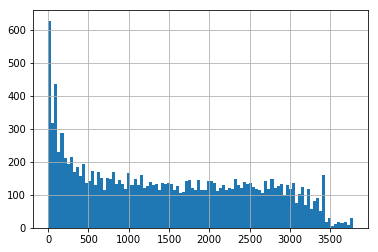

In [6]:
df['minutes_pl'].hist(bins=100)

In [7]:
df[df['minutes_pl'] > 5*90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10156 entries, 0 to 13357
Data columns (total 49 columns):
games_starts_gk                  778 non-null float64
losses                           778 non-null float64
nationality                      10098 non-null object
player                           10156 non-null object
position                         10143 non-null object
age                              10143 non-null float64
wins                             778 non-null float64
games_subs_gk                    778 non-null float64
goals_against                    778 non-null float64
shots_on_target_against          778 non-null float64
games_gk                         778 non-null float64
clean_sheets                     778 non-null float64
minutes_gk                       778 non-null float64
draws                            778 non-null float64
squad                            10156 non-null object
pens_made                        10116 non-null float64
fouls              

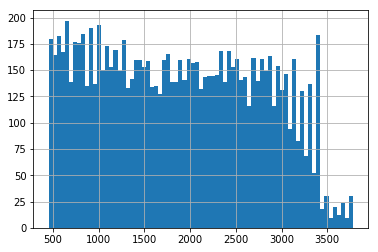

In [8]:
df[df['minutes_pl'] > 5*90]['minutes_pl'].hist(bins=75)

In [9]:
df = df[df['minutes_pl'] > 5*90]

In [25]:
FWs = df[df['position'].apply(lambda x: ('FW'  in str(x)) | ('MF' in str(x)))]
#FWs = FWs[FWs['position'].apply(lambda x: 'MF' in str(x))]

In [26]:
FWs = FWs.drop('games_starts_gk',axis=1)
FWs = FWs.drop('losses',axis=1)
FWs = FWs.drop('wins',axis=1)
FWs = FWs.drop('games_subs_gk',axis=1)
FWs = FWs.drop('goals_against',axis=1)
FWs = FWs.drop('shots_on_target_against',axis=1)
FWs = FWs.drop('games_gk',axis=1)
FWs = FWs.drop('clean_sheets',axis=1)
FWs = FWs.drop('minutes_gk',axis=1)
FWs = FWs.drop('draws',axis=1)
FWs = FWs.drop('cards_yellow',axis=1)
FWs = FWs.drop('cards_red',axis=1)
FWs = FWs.drop('fouls',axis=1)
FWs = FWs.drop('fouls_squad',axis=1)
FWs = FWs.drop('players_used',axis=1)
FWs = FWs.drop('cards_yellow_squad',axis=1)
FWs = FWs.drop('cards_red_squad',axis=1)
FWs = FWs.drop('games_starts_gk_squad',axis=1)
FWs = FWs.drop('minutes_gk_squad',axis=1)
FWs = FWs.drop('games_subs_gk_squad',axis=1)
FWs = FWs.drop('keepers_used_gk',axis=1)
FWs = FWs.drop('games_gk_squad',axis=1)
FWs = FWs.drop('shots_on_target_against_squad',axis=1)
FWs = FWs.drop('goals_against_squad',axis=1)
FWs = FWs.drop('clean_sheets_squad',axis=1)
FWs = FWs.drop('games_starts_pl',axis=1)
FWs = FWs.drop('games_subs_pl',axis=1)
FWs = FWs.drop('pens_att_squad',axis=1)
FWs = FWs.drop('pens_made_squad',axis=1)
FWs = FWs.drop('pens_made',axis=1)
FWs = FWs.drop('pens_att',axis=1)

In [27]:
FWs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 1 to 13356
Data columns (total 18 columns):
nationality              6308 non-null object
player                   6323 non-null object
position                 6323 non-null object
age                      6323 non-null float64
squad                    6323 non-null object
goals                    6322 non-null float64
games_pl                 6323 non-null float64
assists                  6299 non-null float64
minutes_pl               6323 non-null float64
shots_on_target          6296 non-null float64
season                   6323 non-null int64
assists_squad            6323 non-null int64
goals_squad              6323 non-null int64
games                    6323 non-null int64
shots_on_target_squad    6323 non-null int64
losses_squad             6323 non-null int64
wins_squad               6323 non-null int64
draws_squad              6323 non-null int64
dtypes: float64(6), int64(8), object(4)
memory usage: 938.6+ KB


In [28]:
FWs.groupby(by=['player','nationality']).head()

nationality                  player  position   age             squad  \
1              ie        Eddie McGoldrick  MF,DF,FW  27.0    Crystal Palace   
2             eng         Chris Armstrong        FW  21.0    Crystal Palace   
7             eng            Geoff Thomas        MF  27.0    Crystal Palace   
9             eng            Simon Osborn        MF  20.0    Crystal Palace   
11            eng            Simon Rodger        MF  20.0    Crystal Palace   
13            eng           Paul Williams        FW  26.0    Crystal Palace   
14            eng             John Salako        MF  23.0    Crystal Palace   
15            eng             George Ndah        FW  17.0    Crystal Palace   
25            wal          David Phillips     DF,MF  29.0      Norwich City   
28            eng            Chris Sutton     DF,FW  19.0      Norwich City   
29             ms                Ruel Fox        MF  24.0      Norwich City   
30            eng               Ian Crook        MF  29.0      Norwich City   
31            eng             Mark Robins        FW  22.0      Norwich City   
33            wal             Jeremy Goss        MF  27.0      Norwich City   
34            eng             Gary Megson        MF  33.0      Norwich City   
37             ie               Lee Power        FW  20.0      Norwich City   
44            eng             Mike Newell        FW  27.0  Blackburn Rovers   
45            eng           Stuart Ripley     MF,FW  24.0  Blackburn Rovers   
46            eng            Tim Sherwood        MF  23.0  Blackburn Rovers   
49            eng            Jason Wilcox     FW,MF  21.0  Blackburn Rovers   
50            sco         Kevin Gallacher     FW,MF  25.0  Blackburn Rovers   
51            eng             Mark Atkins     DF,MF  23.0  Blackburn Rovers   
53            eng           Gordon Cowans        MF  33.0  Blackburn Rovers   
54            eng            Alan Shearer        FW  21.0  Blackburn Rovers   
66            eng         Matt Le Tissier     MF,FW  23.0       Southampton   
68            eng           Neil Maddison     MF,DF  22.0       Southampton   
69            nir              Iain Dowie        FW  27.0       Southampton   
72            nir           Kevin Horlock        MF  19.0       Southampton   
76            eng         Glenn Cockerill        MF  32.0       Southampton   
78            eng            Nicky Banger        FW  21.0       Southampton   
...           ...                     ...       ...   ...               ...   
13271          dk         Pierre Højbjerg        MF  21.0       Southampton   
13274          ma          Sofiane Boufal        MF  23.0       Southampton   
13275          it       Manolo Gabbiadini        FW  25.0       Southampton   
13276         eng          Charlie Austin        FW  28.0       Southampton   
13287          eg           Mohamed Salah     MF,FW  25.0         Liverpool   
13288          br         Roberto Firmino     MF,FW  25.0         Liverpool   
13289          nl     Georginio Wijnaldum        MF  26.0         Liverpool   
13290          sn              Sadio Mané     MF,FW  25.0         Liverpool   
13293          de                Emre Can     DF,MF  23.0         Liverpool   
13294          cm              Joël Matip     MF,DF  25.0         Liverpool   
13298         eng  Trent Alexander-Arnold     DF,MF  18.0         Liverpool   
13301          es          Alberto Moreno     DF,MF  25.0         Liverpool   
13303         eng         Dominic Solanke        FW  19.0         Liverpool   
13316          sn        Cheikhou Kouyaté     DF,MF  27.0   West Ham United   
13318          at        Marko Arnautović     MF,FW  28.0   West Ham United   
13319          ar          Manuel Lanzini        MF  24.0   West Ham United   
13321          es            Pedro Obiang        MF  25.0   West Ham United   
13322          mx        Javier Hernández        FW  29.0   West Ham United   
13325         eng         Michail Antonio     FW,MF  27.

In [29]:
test = FWs.groupby(by=['player','nationality','position'])

In [30]:
five_seasons = pd.DataFrame(test.count()['season'] >= 4)

In [31]:
FWs = FWs.merge(five_seasons,on=['player','nationality','position'],suffixes=('','_4'))

In [32]:
FWs.columns

Index(['nationality', 'player', 'position', 'age', 'squad', 'goals',
       'games_pl', 'assists', 'minutes_pl', 'shots_on_target', 'season',
       'assists_squad', 'goals_squad', 'games', 'shots_on_target_squad',
       'losses_squad', 'wins_squad', 'draws_squad', 'season_4'],
      dtype='object')

In [33]:
Good_FWs = FWs[FWs['season_4'] == True]

In [34]:
Good_FWs = Good_FWs.drop('season_4',axis=1)
Good_FWs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 1 to 5958
Data columns (total 18 columns):
nationality              3845 non-null object
player                   3845 non-null object
position                 3845 non-null object
age                      3845 non-null float64
squad                    3845 non-null object
goals                    3844 non-null float64
games_pl                 3845 non-null float64
assists                  3825 non-null float64
minutes_pl               3845 non-null float64
shots_on_target          3823 non-null float64
season                   3845 non-null int64
assists_squad            3845 non-null int64
goals_squad              3845 non-null int64
games                    3845 non-null int64
shots_on_target_squad    3845 non-null int64
losses_squad             3845 non-null int64
wins_squad               3845 non-null int64
draws_squad              3845 non-null int64
dtypes: float64(6), int64(8), object(4)
memory usage: 570.7+ KB


In [35]:
Good_FWs.head()

nationality           player position   age              squad  goals  \
1         eng  Chris Armstrong       FW  21.0     Crystal Palace   15.0   
2         eng  Chris Armstrong       FW  23.0     Crystal Palace    8.0   
3         eng  Chris Armstrong       FW  24.0  Tottenham Hotspur   15.0   
4         eng  Chris Armstrong       FW  25.0  Tottenham Hotspur    5.0   
5         eng  Chris Armstrong       FW  26.0  Tottenham Hotspur    5.0   

   games_pl  assists  minutes_pl  shots_on_target  season  assists_squad  \
1      35.0      1.0      3104.0             37.0    1992             30   
2      40.0      3.0      3586.0             28.0    1994             22   
3      35.0      6.0      3105.0             41.0    1995             38   
4      12.0      1.0       974.0             15.0    1996             32   
5      19.0      0.0      1284.0             14.0    1997             39   

   goals_squad  games  shots_on_target_squad  losses_squad  wins_squad  \
1           45     42                    160            15          11   
2           33     42                    132            19          11   
3           47     38                    181             9          16   
4           43     38                    191            18          13   
5           44     38                    208            16          11   

   draws_squad  
1           16  
2           12  
3           13  
4            7  
5           11

In [36]:
test = Good_FWs.groupby(by=['player','nationality','position'])

In [37]:
len(test)

604

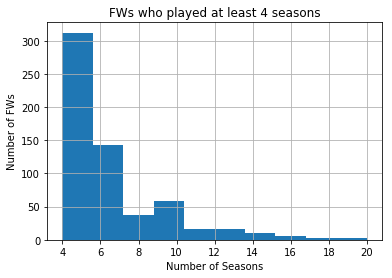

In [38]:
test.count()['season'].hist()
plt.ylabel('Number of FWs')
plt.xlabel('Number of Seasons')
plt.title('FWs who played at least 4 seasons')
plt.show()

In [39]:
Good_FWs['goals_per_SoT'] = Good_FWs['goals']/Good_FWs['shots_on_target']

In [40]:
#sns.pairplot(Good_FWs)

In [41]:
Good_FWs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 1 to 5958
Data columns (total 19 columns):
nationality              3845 non-null object
player                   3845 non-null object
position                 3845 non-null object
age                      3845 non-null float64
squad                    3845 non-null object
goals                    3844 non-null float64
games_pl                 3845 non-null float64
assists                  3825 non-null float64
minutes_pl               3845 non-null float64
shots_on_target          3823 non-null float64
season                   3845 non-null int64
assists_squad            3845 non-null int64
goals_squad              3845 non-null int64
games                    3845 non-null int64
shots_on_target_squad    3845 non-null int64
losses_squad             3845 non-null int64
wins_squad               3845 non-null int64
draws_squad              3845 non-null int64
goals_per_SoT            3732 non-null float64
dtypes: float64(7), 

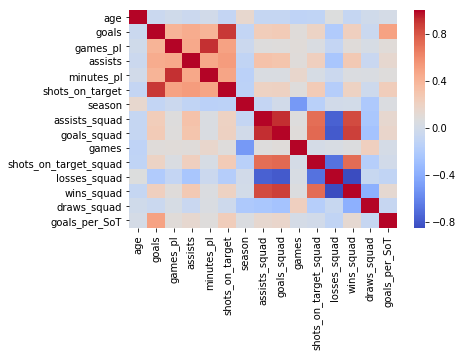

In [42]:
sns.heatmap(Good_FWs.corr(),cmap='coolwarm')

In [43]:
Good_FWs['FW'] = Good_FWs['position'].apply(lambda x: 'FW' in str(x))
Good_FWs['MF'] = Good_FWs['position'].apply(lambda x: 'MF' in str(x))
Good_FWs['DF'] = Good_FWs['position'].apply(lambda x: 'DF' in str(x))
Good_FWs = Good_FWs.drop('position',axis=1)

In [44]:
Good_FWs

nationality            player   age                 squad  goals  \
1            eng   Chris Armstrong  21.0        Crystal Palace   15.0   
2            eng   Chris Armstrong  23.0        Crystal Palace    8.0   
3            eng   Chris Armstrong  24.0     Tottenham Hotspur   15.0   
4            eng   Chris Armstrong  25.0     Tottenham Hotspur    5.0   
5            eng   Chris Armstrong  26.0     Tottenham Hotspur    5.0   
6            eng   Chris Armstrong  27.0     Tottenham Hotspur    8.0   
7            eng   Chris Armstrong  28.0     Tottenham Hotspur   14.0   
14           eng       John Salako  23.0        Crystal Palace    0.0   
15           eng       John Salako  25.0        Crystal Palace    4.0   
16           eng       John Salako  26.0         Coventry City    3.0   
17           eng       John Salako  27.0         Coventry City    1.0   
18           eng       John Salako  28.0      Bolton Wanderers    0.0   
19           eng       John Salako  31.0     Charlton Athletic    0.0   
25           eng      Chris Sutton  19.0          Norwich City    8.0   
26           eng      Chris Sutton  20.0          Norwich City   25.0   
27           eng      Chris Sutton  21.0      Blackburn Rovers   15.0   
28           eng      Chris Sutton  23.0      Blackburn Rovers   11.0   
29           eng      Chris Sutton  24.0      Blackburn Rovers   18.0   
30            ms          Ruel Fox  24.0          Norwich City    4.0   
31            ms          Ruel Fox  25.0      Newcastle United    2.0   
32            ms          Ruel Fox  26.0      Newcastle United   10.0   
33            ms          Ruel Fox  27.0     Tottenham Hotspur    6.0   
34            ms          Ruel Fox  28.0     Tottenham Hotspur    1.0   
35            ms          Ruel Fox  29.0     Tottenham Hotspur    3.0   
36            ms          Ruel Fox  30.0     Tottenham Hotspur    3.0   
49           eng       Mike Newell  27.0      Blackburn Rovers   13.0   
50           eng       Mike Newell  28.0      Blackburn Rovers    6.0   
51           eng       Mike Newell  30.0      Blackburn Rovers    3.0   
52           eng       Mike Newell  31.0       West Ham United    0.0   
53           eng     Stuart Ripley  24.0      Blackburn Rovers    7.0   
...          ...               ...   ...                   ...    ...   
5801         eng    Saido Berahino  21.0  West Bromwich Albion    4.0   
5802         eng    Saido Berahino  23.0            Stoke City    0.0   
5833          es     Ander Herrera  24.0     Manchester United    6.0   
5834          es     Ander Herrera  25.0     Manchester United    3.0   
5835          es     Ander Herrera  26.0     Manchester United    1.0   
5836          es     Ander Herrera  27.0     Manchester United    0.0   
5847         eng       Tom Carroll  22.0          Swansea City    0.0   
5848         eng       Tom Carroll  23.0     Tottenham Hotspur    1.0   
5849         eng       Tom Carroll  24.0          Swansea City    1.0   
5850         eng       Tom Carroll  25.0          Swansea City    0.0   
5920          rs       Dušan Tadić  25.0           Southampton    4.0   
5921          rs       Dušan Tadić  26.0           Southampton    8.0   
5922          rs       Dušan Tadić  27.0           Southampton    3.0   
5923          rs       Dušan Tadić  28.0           Southampton    6.0   
5941         eng       Jamie Vardy  27.0        Leicester City    5.0   
5942         eng       Jamie Vardy  28.0        Leicester City   24.0   
5943         eng       Jamie Vardy  29.0        Leicester City   13.0   
5944         eng       Jamie Vardy  30.0        Leicester City   20.0   
5945          dz      Riyad Mahrez  23.0        Leicester City    4.0   
5946          dz      Riyad Mahrez  24.0        Leicester City   17.0   
5947          dz      Riyad Mahrez  25.0        Leicester City    6.0   
5948          dz      Riyad Mahrez  26.0        Leicester City   12.0   
5951         eng  Danny Drinkwater  24.0        Leicester City 

In [45]:
test = Good_FWs.groupby(by=['player','nationality','FW','MF','DF'])

In [46]:
Players = pd.DataFrame(test.count())

In [47]:
player_list = Players.index.tolist()

In [48]:
Good_FWs = Good_FWs.drop(['squad','losses_squad','wins_squad','draws_squad','goals_squad'],1)
Good_FWs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 1 to 5958
Data columns (total 16 columns):
nationality              3845 non-null object
player                   3845 non-null object
age                      3845 non-null float64
goals                    3844 non-null float64
games_pl                 3845 non-null float64
assists                  3825 non-null float64
minutes_pl               3845 non-null float64
shots_on_target          3823 non-null float64
season                   3845 non-null int64
assists_squad            3845 non-null int64
games                    3845 non-null int64
shots_on_target_squad    3845 non-null int64
goals_per_SoT            3732 non-null float64
FW                       3845 non-null bool
MF                       3845 non-null bool
DF                       3845 non-null bool
dtypes: bool(3), float64(7), int64(4), object(2)
memory usage: 431.8+ KB


In [49]:
player_list = Players.reset_index().set_index('player').index.tolist()

In [50]:
len(player_list)

560

In [51]:
len(set(player_list))

560

In [52]:
(Players.reset_index())['player'].nunique()

560

In [53]:
orig_good_FWs = Good_FWs.copy()
Good_FWs = Good_FWs.drop(['FW','MF','DF'],axis=1)

/anaconda2/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda2/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2296.,  729.,  452.,  168.,   90.,   55.,   19.,   22.,    7.,
           6.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

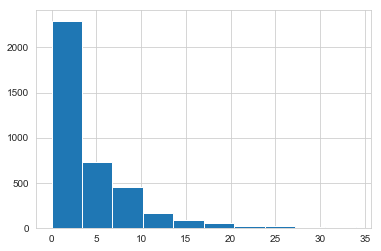

In [640]:
plt.hist(Good_FWs['goals'])

(array([1746., 1070.,  553.,  233.,  128.,   48.,   27.,   11.,    5.,
           2.]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <a list of 10 Patch objects>)

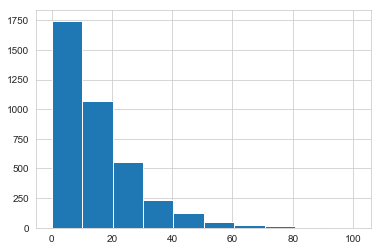

In [641]:
plt.hist(Good_FWs['shots_on_target'])

In [54]:
full_players = pd.DataFrame()
for player in Good_FWs['player'].unique():
    one_player = Good_FWs[Good_FWs['player'] == player]
    nat = Good_FWs[Good_FWs['player'] == player]['nationality'].unique()
    #first_season = one_player['season'].min()
    seasons_list = list(Good_FWs[Good_FWs['player'] == player]['season'].unique())
    my_one_player = pd.DataFrame({'player':player,'nationality':nat})
    for season in one_player['season']:
        one_player_season = one_player[one_player['season'] == season]
        #print(seasons_list.index(season))
        one_player_season['season_num'] = seasons_list.index(season)
        my_one_player = my_one_player.merge(one_player_season,on=['player','nationality'],suffixes=('','_{0}'.format(one_player_season['season_num'].iloc[0])))
    full_players = full_players.append(my_one_player,ignore_index=True)

/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda2/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [55]:
full_players.head()

age  age_1  age_10  age_11  age_12  age_13  age_14  age_15  age_16  \
0  21.0   23.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  23.0   25.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2  19.0   20.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3  24.0   25.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4  27.0   28.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   age_17  ...  shots_on_target_squad_2  shots_on_target_squad_20  \
0     NaN  ...                      181                       NaN   
1     NaN  ...                      183                       NaN   
2     NaN  ...                      264                       NaN   
3     NaN  ...                      172                       NaN   
4     NaN  ...                      220                       NaN   

   shots_on_target_squad_21  shots_on_target_squad_3  shots_on_target_squad_4  \
0                       NaN                      191                    208.0   
1                       NaN                      183                    233.0   
2                       NaN                      166                    230.0   
3                       NaN                      181                    191.0   
4                       NaN                      219                      NaN   

   shots_on_target_squad_5  shots_on_target_squad_6  shots_on_target_squad_7  \
0                    200.0                    207.0                      NaN   
1                    216.0                      NaN                      NaN   
2                    220.0                    177.0                    197.0   
3                    208.0                    200.0                      NaN   
4                      NaN                      NaN                      NaN   

   shots_on_target_squad_8  shots_on_target_squad_9  
0                      NaN                      NaN  
1                      NaN                      NaN  
2                    171.0                    228.0  
3                      NaN                      NaN  
4                      NaN                      NaN  

[5 rows x 266 columns]

In [56]:
full_players['player']

0         Chris Armstrong
1             John Salako
2            Chris Sutton
3                Ruel Fox
4             Mike Newell
5           Stuart Ripley
6            Tim Sherwood
7            Jason Wilcox
8         Kevin Gallacher
9            Alan Shearer
10        Matt Le Tissier
11          Neil Maddison
12             Iain Dowie
13          Kevin Horlock
14      Tommy Widdrington
15              Paul Ince
16             Ryan Giggs
17            Mark Hughes
18             Lee Sharpe
19     Andrei Kanchelskis
20           Robbie Earle
21        Dean Holdsworth
22           Vinnie Jones
23            Neal Ardley
24            Andy Clarke
25            Niall Quinn
26        Garry Flitcroft
27         Kevin Campbell
28            Paul Merson
29            John Jensen
              ...        
530        Rickie Lambert
531          Adam Lallana
532         Jay Rodriguez
533     James Ward-Prowse
534     Philippe Coutinho
535             Leroy Fer
536        Nathan Redmond
537         

In [57]:
full_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Columns: 266 entries, age to shots_on_target_squad_9
dtypes: float64(244), int64(20), object(2)
memory usage: 1.1+ MB


In [58]:
list(full_players.columns)

['age',
 'age_1',
 'age_10',
 'age_11',
 'age_12',
 'age_13',
 'age_14',
 'age_15',
 'age_16',
 'age_17',
 'age_18',
 'age_19',
 'age_2',
 'age_20',
 'age_21',
 'age_3',
 'age_4',
 'age_5',
 'age_6',
 'age_7',
 'age_8',
 'age_9',
 'assists',
 'assists_1',
 'assists_10',
 'assists_11',
 'assists_12',
 'assists_13',
 'assists_14',
 'assists_15',
 'assists_16',
 'assists_17',
 'assists_18',
 'assists_19',
 'assists_2',
 'assists_20',
 'assists_21',
 'assists_3',
 'assists_4',
 'assists_5',
 'assists_6',
 'assists_7',
 'assists_8',
 'assists_9',
 'assists_squad',
 'assists_squad_1',
 'assists_squad_10',
 'assists_squad_11',
 'assists_squad_12',
 'assists_squad_13',
 'assists_squad_14',
 'assists_squad_15',
 'assists_squad_16',
 'assists_squad_17',
 'assists_squad_18',
 'assists_squad_19',
 'assists_squad_2',
 'assists_squad_20',
 'assists_squad_21',
 'assists_squad_3',
 'assists_squad_4',
 'assists_squad_5',
 'assists_squad_6',
 'assists_squad_7',
 'assists_squad_8',
 'assists_squad_9',
 '

In [59]:
full_players[['player','season','season_num','goals','season_1','season_num_1','goals_1','season_2','season_num_2','goals_2']]





player  season  season_num  goals  season_1  season_num_1  \
0       Chris Armstrong    1992           0   15.0      1994             1   
1           John Salako    1992           0    0.0      1994             1   
2          Chris Sutton    1992           0    8.0      1993             1   
3              Ruel Fox    1992           0    4.0      1993             1   
4           Mike Newell    1992           0   13.0      1993             1   
5         Stuart Ripley    1992           0    7.0      1993             1   
6          Tim Sherwood    1992           0    3.0      1993             1   
7          Jason Wilcox    1992           0    4.0      1993             1   
8       Kevin Gallacher    1992           0   11.0      1993             1   
9          Alan Shearer    1992           0   16.0      1993             1   
10      Matt Le Tissier    1992           0   15.0      1993             1   
11        Neil Maddison    1992           0    4.0      1993             1   
12           Iain Dowie    1992           0   11.0      1993             1   
13        Kevin Horlock    1992           0    0.0      1993             1   
14    Tommy Widdrington    1992           0    0.0      1993             1   
15            Paul Ince    1992           0    6.0      1993             1   
16           Ryan Giggs    1992           0    9.0      1995             1   
17          Mark Hughes    1992           0   15.0      1993             1   
18           Lee Sharpe    1992           0    1.0      1993             1   
19   Andrei Kanchelskis    1992           0    3.0      1994             1   
20         Robbie Earle    1992           0    7.0      1993             1   
21      Dean Holdsworth    1992           0   19.0      1993             1   
22         Vinnie Jones    1992           0    1.0      1993             1   
23          Neal Ardley    1992           0    4.0      1993             1   
24          Andy Clarke    1992           0    5.0      1993             1   
25          Niall Quinn    1992           0    8.0      1993             1   
26      Garry Flitcroft    1992           0    5.0      1993             1   
27       Kevin Campbell    1992           0    4.0      1993             1   
28          Paul Merson    1992           0    6.0      1993             1   
29          John Jensen    1992           0    0.0      1993             1   
..                  ...     ...         ...    ...       ...           ...   
530      Rickie Lambert    2012           0   15.0      2013             1   
531        Adam Lallana    2012           0    3.0      2014             1   
532       Jay Rodriguez    2012           0    6.0      2013             1   
533   James Ward-Prowse    2012           0    0.0      2013             1   
534   Philippe Coutinho    2013           0    5.0      2014             1   
535           Leroy Fer    2013           0    3.0      2014             1   
536      Nathan Redmond    2013           0    1.0      2015             1   
537          Mesut Özil    2013           0    5.0      2014             1   
538     Yannick Bolasie    2013           0    0.0      2014             1   
539          Joe Ledley    2013           0    2.0      2014             1   
540        Dwight Gayle    2013           0    7.0      2014             1   
541      Étienne Capoue    2013           0    1.0      2014             1   
542          Harry Kane    2013           0    3.0      2014             1   
543        Ross Barkley    2013           0    6.0      2014             1   
544             Willian    2013           0    4.0      2014             1   
545       Nemanja Matić    2013           0    0.0      2014             1   
546         Fernandinho    2013           0    5.0      2014             1   
547         Jesús Navas    2013           0    4.0      2014             1   
548           Jack Cork    2013           0    0.0      2014             1   
549      Victor Wanyama    2013        

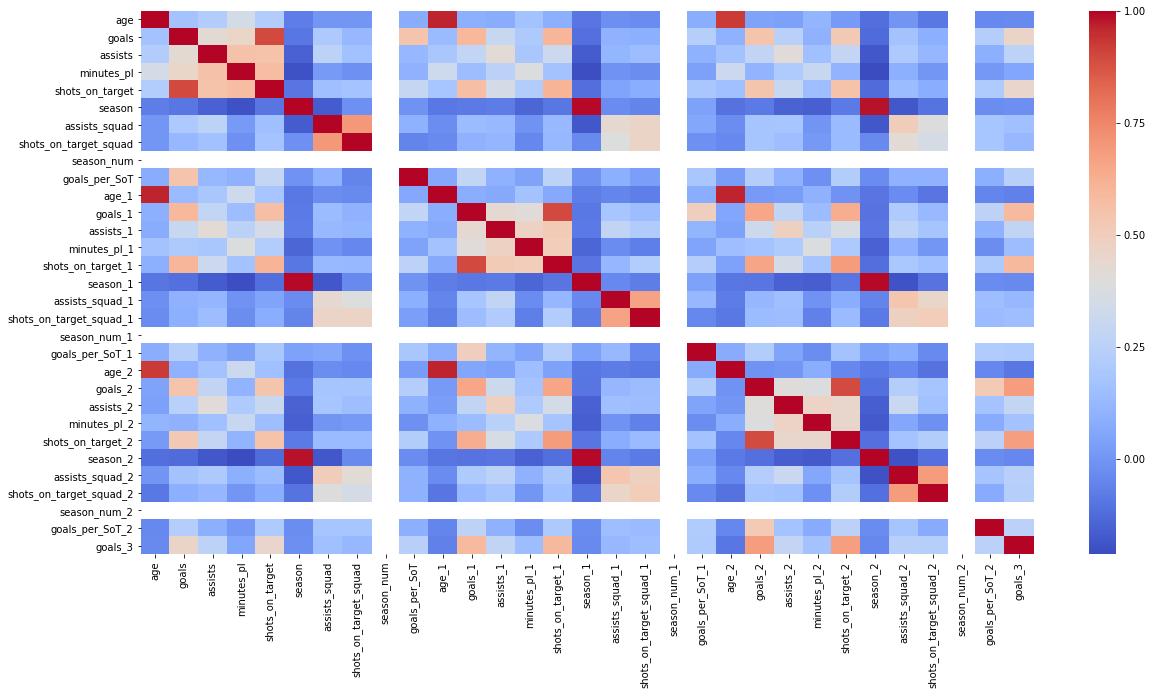

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(full_players[['age','goals','assists','minutes_pl','shots_on_target','season',
                              'assists_squad','shots_on_target_squad','season_num','goals_per_SoT',
                     'age_1','goals_1','assists_1','minutes_pl_1','shots_on_target_1','season_1',
                              'assists_squad_1','shots_on_target_squad_1','season_num_1','goals_per_SoT_1',
                     'age_2','goals_2','assists_2','minutes_pl_2','shots_on_target_2','season_2',
                              'assists_squad_2','shots_on_target_squad_2','season_num_2','goals_per_SoT_2','goals_3']].corr(),cmap='coolwarm')

In [1585]:
cols_0 = [#'age',
 #'goals',
 #'assists',
 #'minutes_pl',
 'shots_on_target',
 #'season',
 #'assists_squad',
 #'shots_on_target_squad',
 #'goals_per_SoT'
]
cols_1 = [s + "_1" for s in cols_0]
cols_2 = [s + "_2" for s in cols_0]
cols_3 = [s + "_3" for s in cols_0]
cols_4 = [s + "_4" for s in cols_0]
cols_5 = [s + "_5" for s in cols_0]
cols_6 = [s + "_6" for s in cols_0]
cols_7 = [s + "_7" for s in cols_0]
cols_8 = [s + "_8" for s in cols_0]
cols_9 = [s + "_9" for s in cols_0]

In [1571]:
corr_df = pd.DataFrame(full_players[cols_0+cols_1+cols_2].corrwith(full_players['goals_3']).rename('goals_3')).T

In [1572]:
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3].corrwith(full_players['goals_4']).rename('goals_4')).T)
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4].corrwith(full_players['goals_5']).rename('goals_5')).T)
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4+cols_5].corrwith(full_players['goals_6']).rename('goals_6')).T)
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4+cols_5+cols_6].corrwith(full_players['goals_7']).rename('goals_7')).T)
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4+cols_5+cols_6+cols_7].corrwith(full_players['goals_8']).rename('goals_8')).T)
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4+cols_5+cols_6+cols_7+cols_8].corrwith(full_players['goals_9']).rename('goals_9')).T)
corr_df = corr_df.append(pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4+cols_5+cols_6+cols_7+cols_8+cols_9].corrwith(full_players['goals_10']).rename('goals_10')).T)




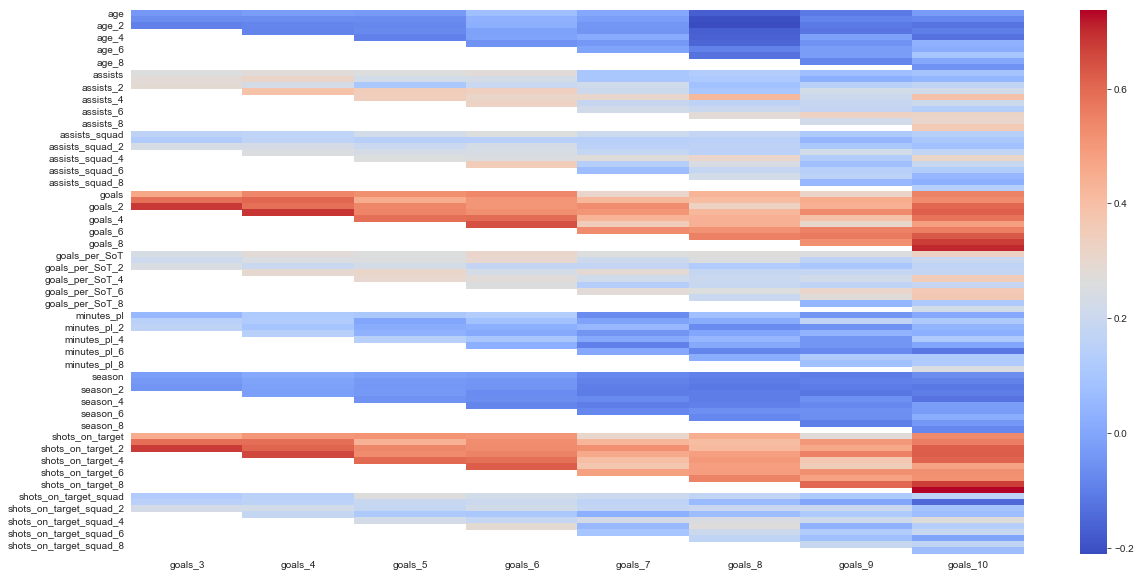

In [1573]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_df.T,cmap='coolwarm')

In [1574]:
pd.DataFrame(full_players[cols_0+cols_1+cols_2].corrwith(full_players['goals_3']))[0].sort_values(ascending=False)

goals_2                    0.683912
shots_on_target_2          0.680206
shots_on_target_1          0.591807
goals_1                    0.587081
goals                      0.464253
shots_on_target            0.454855
assists_2                  0.285495
assists_1                  0.278036
assists                    0.260133
goals_per_SoT_2            0.251885
assists_squad_2            0.239731
goals_per_SoT              0.237099
shots_on_target_squad_2    0.232668
goals_per_SoT_1            0.210746
minutes_pl_2               0.166036
assists_squad              0.159887
shots_on_target_squad_1    0.150522
minutes_pl_1               0.144777
assists_squad_1            0.125320
shots_on_target_squad      0.123264
minutes_pl                 0.054171
season                    -0.021806
season_1                  -0.034160
age                       -0.037477
season_2                  -0.047148
age_1                     -0.064073
age_2                     -0.092643
Name: 0, dtype: float64

In [1576]:
pd.DataFrame(full_players[cols_0+cols_1+cols_2+cols_3+cols_4].corrwith(full_players['goals_5']))[0].sort_values(ascending=False)



shots_on_target_4          0.601088
goals_4                    0.589932
goals_3                    0.546297
shots_on_target_2          0.544237
goals_2                    0.541074
shots_on_target_3          0.532764
goals                      0.523220
shots_on_target            0.512894
goals_1                    0.454766
shots_on_target_1          0.437901
assists_3                  0.346160
assists_4                  0.342682
goals_per_SoT_3            0.311138
goals_per_SoT_4            0.301686
shots_on_target_squad      0.264756
goals_per_SoT              0.262211
assists                    0.262092
assists_squad_4            0.259713
goals_per_SoT_1            0.257202
assists_squad_3            0.234345
shots_on_target_squad_4    0.228566
goals_per_SoT_2            0.227229
assists_squad              0.225544
assists_1                  0.224258
assists_squad_2            0.194661
shots_on_target_squad_1    0.191801
shots_on_target_squad_2    0.184273
assists_squad_1            0

/anaconda2/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


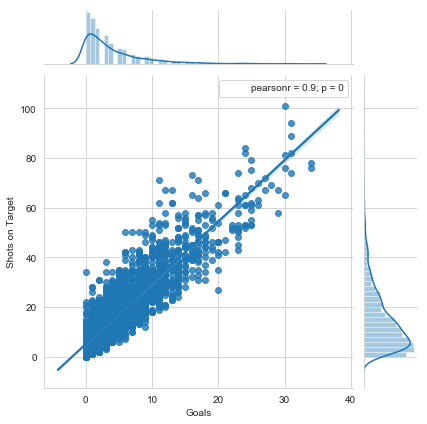

In [714]:
import scipy.stats as stats
h = sns.jointplot(x='goals',y='shots_on_target',data=Good_FWs,kind="reg")
h.annotate(stats.pearsonr)
h.set_axis_labels('Goals', 'Shots on Target')
plt.show()

/anaconda2/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


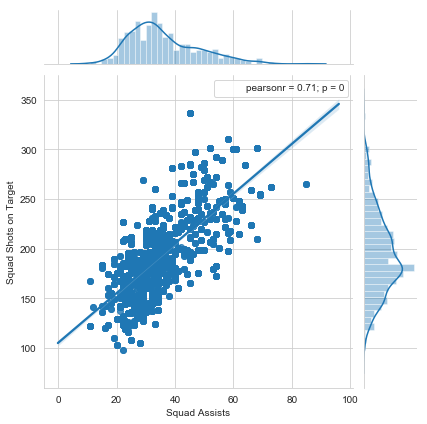

In [715]:
import scipy.stats as stats
h = sns.jointplot(x='assists_squad',y='shots_on_target_squad',data=Good_FWs,kind="reg")
h.annotate(stats.pearsonr)
h.set_axis_labels('Squad Assists', 'Squad Shots on Target')
plt.show()

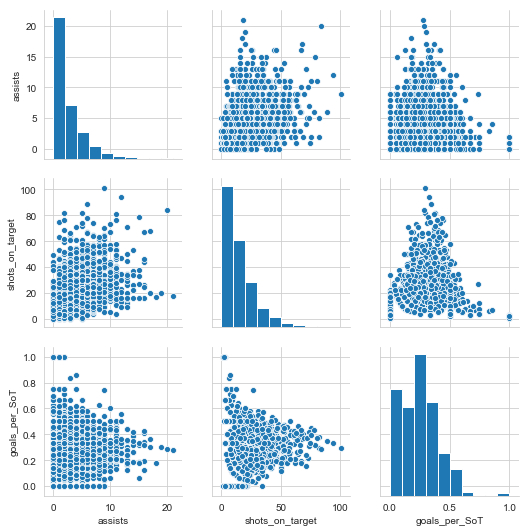

In [1579]:
sns.pairplot(Good_FWs[[#'age',
 #'goals',
 'assists',
 #'minutes_pl',
 'shots_on_target',
 #'season',
 #'assists_squad',
 #'shots_on_target_squad',
 'goals_per_SoT'
]])

In [1580]:
list(Good_FWs.columns)

['nationality',
 'player',
 'age',
 'goals',
 'games_pl',
 'assists',
 'minutes_pl',
 'shots_on_target',
 'season',
 'assists_squad',
 'games',
 'shots_on_target_squad',
 'goals_per_SoT']

In [718]:
X = full_players[cols_0+cols_1+cols_2+['player','goals_3']].set_index('player')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, Chris Armstrong to Andy King
Data columns (total 4 columns):
shots_on_target      558 non-null float64
shots_on_target_1    556 non-null float64
shots_on_target_2    557 non-null float64
goals_3              560 non-null float64
dtypes: float64(4)
memory usage: 21.9+ KB


In [719]:
X_temp = X[X.isnull().any(axis=1)]
print(X_temp)

                 shots_on_target  shots_on_target_1  shots_on_target_2  \
player                                                                   
Ruel Fox                    18.0                NaN               26.0   
Iain Dowie                  42.0               31.0                NaN   
Gordon Watson                5.0               28.0                NaN   
Eric Cantona                 NaN               49.0               27.0   
Peter Beagrie               14.0                NaN               16.0   
Guy Whittingham             12.0                NaN               16.0   
Andy Cole                   78.0                NaN               31.0   
Ian Taylor                   NaN               11.0               12.0   
Lee Carsley                  3.0               11.0                NaN   

                 goals_3  
player                    
Ruel Fox             6.0  
Iain Dowie           8.0  
Gordon Watson        3.0  
Eric Cantona        14.0  
Peter Beagrie        7.

In [720]:
X = X.dropna()

In [721]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, Chris Armstrong to Andy King
Data columns (total 4 columns):
shots_on_target      551 non-null float64
shots_on_target_1    551 non-null float64
shots_on_target_2    551 non-null float64
goals_3              551 non-null float64
dtypes: float64(4)
memory usage: 21.5+ KB


In [1678]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [1679]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('goals_3',axis=1),X['goals_3'], test_size=0.2)

In [1680]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, Amdy Faye to Mark Draper
Data columns (total 3 columns):
shots_on_target      440 non-null float64
shots_on_target_1    440 non-null float64
shots_on_target_2    440 non-null float64
dtypes: float64(3)
memory usage: 13.8+ KB


In [1681]:
rng = np.random.RandomState(304)
scaler = QuantileTransformer(output_distribution='normal',random_state=rng)
#scaler = StandardScaler()
#scaler = PowerTransformer(method='box-cox')
#rng2 = np.random.RandomState(101)
#y_scaler = QuantileTransformer(output_distribution='normal',random_state=rng2)
#y_scaler = StandardScaler()
y_scaler = PowerTransformer(method='yeo-johnson')

In [1682]:
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

In [1683]:
X_test_scaled = scaler.transform(X_test)
y_test_scaled = y_scaler.transform(np.array(y_test).reshape(-1,1))

In [1684]:
X_train_scaled

array([[-0.54233523, -1.19976601, -0.89390752],
       [-0.04392402, -0.64872442,  0.51922535],
       [ 0.61654097,  0.80395767,  0.9127741 ],
       ...,
       [ 0.19314317,  1.81950075,  2.77859011],
       [-1.51358893, -1.4568958 , -1.37811376],
       [-0.04392402, -0.14985264, -0.03513515]])

In [1685]:
y_train_scaled

array([[-1.48513258],
       [-0.57329919],
       [ 0.71485662],
       [ 0.26054953],
       [ 1.35120289],
       [-1.48513258],
       [ 0.26054953],
       [-1.48513258],
       [-1.48513258],
       [-1.48513258],
       [ 1.25440911],
       [-0.57329919],
       [-1.48513258],
       [-0.0765036 ],
       [-1.48513258],
       [ 1.43853565],
       [-1.48513258],
       [ 1.14601463],
       [-0.0765036 ],
       [ 1.77847743],
       [ 0.88143746],
       [-0.57329919],
       [ 0.71485662],
       [ 1.59086965],
       [ 0.26054953],
       [-0.57329919],
       [-0.57329919],
       [-1.48513258],
       [ 0.26054953],
       [-0.57329919],
       [ 1.14601463],
       [ 0.51350987],
       [-1.48513258],
       [ 0.26054953],
       [ 1.14601463],
       [-0.57329919],
       [ 0.51350987],
       [-1.48513258],
       [ 1.77847743],
       [ 0.26054953],
       [ 0.88143746],
       [-0.57329919],
       [-0.0765036 ],
       [-0.0765036 ],
       [ 0.51350987],
       [-0

In [1686]:
np.array(y_train).reshape(-1, 1)

array([[ 0.],
       [ 1.],
       [ 5.],
       [ 3.],
       [10.],
       [ 0.],
       [ 3.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 2.],
       [ 0.],
       [11.],
       [ 0.],
       [ 8.],
       [ 2.],
       [16.],
       [ 6.],
       [ 1.],
       [ 5.],
       [13.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 3.],
       [ 1.],
       [ 8.],
       [ 4.],
       [ 0.],
       [ 3.],
       [ 8.],
       [ 1.],
       [ 4.],
       [ 0.],
       [16.],
       [ 3.],
       [ 6.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 0.],
       [18.],
       [ 2.],
       [ 0.],
       [13.],
       [ 4.],
       [ 6.],
       [ 1.],
       [ 9.],
       [ 0.],
       [ 4.],
       [ 6.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 1.],
       [14.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 8.],
       [ 6.],
      

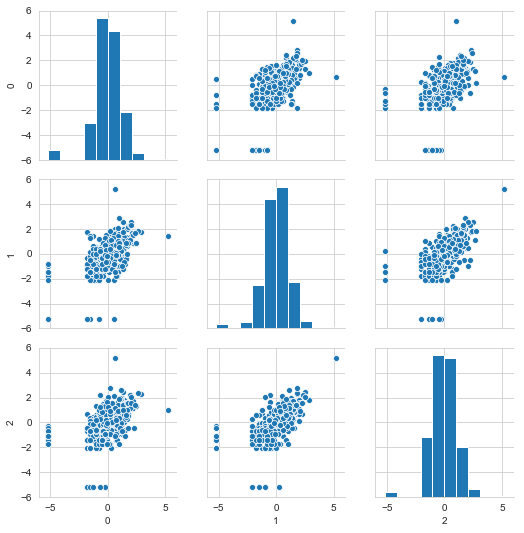

In [1687]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
y_train_scaled_df = pd.DataFrame(y_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
y_test_scaled_df = pd.DataFrame(y_test_scaled)
sns.pairplot(X_train_scaled_df)

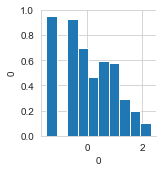

In [1688]:
sns.pairplot(y_train_scaled_df)

In [1689]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1699]:
def first_model():
    model = keras.Sequential([
        layers.Dense(4,activation=tf.nn.relu, input_shape=[len(X_train_scaled_df.keys())]),
        #layers.Dense(2,activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [1700]:
model = first_model()

In [1701]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_327 (Dense)            (None, 4)                 16        
_________________________________________________________________
dense_328 (Dense)            (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [1702]:
example_batch = X_train_scaled_df[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.75868297],
       [ 0.00297897],
       [-1.0133016 ],
       [-0.03536192],
       [ 0.42675805],
       [ 0.41193476],
       [ 0.04024455],
       [ 0.7400219 ],
       [ 0.3819973 ],
       [ 0.6705115 ]], dtype=float32)

In [1703]:
def plot_history(history):
  sns.set_style("whitegrid")
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Normalized Goals]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,4])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [(Normalized Goals)$^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................................................................

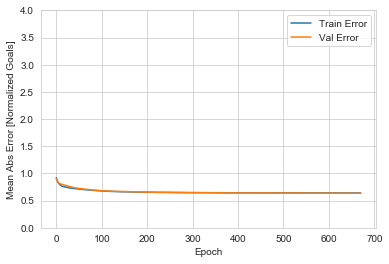

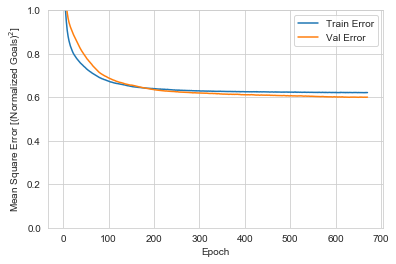

In [1704]:
model = first_model()

EPOCHS = 1000

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train_scaled_df, y_train_scaled_df, epochs=EPOCHS*10,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [1705]:
loss, mae, mse = model.evaluate(X_test_scaled_df, y_test_scaled_df, verbose=0)

In [1706]:
print("Testing set Mean Abs Error: {:5.2f} Normalized Goals".format(mae))

Testing set Mean Abs Error:  0.70 Normalized Goals


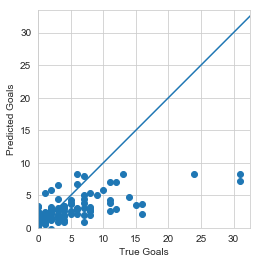

In [1707]:
test_predictions = model.predict(X_test_scaled_df).flatten()
#test_df = pd.DataFrame(y_scaler.inverse_transform(np.array(y_test_scaled_df).reshape(-1, 1))).T.append(pd.DataFrame(y_scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))).T)
plt.scatter(y_scaler.inverse_transform(np.array(y_test_scaled_df).reshape(-1, 1)), y_scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1)))
plt.xlabel('True Goals')
plt.ylabel('Predicted Goals')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-10000, 10000], [-10000, 10000])
#test_df.head()

In [1708]:
X_new = full_players[cols_0+cols_1+cols_2+cols_3+cols_4+['player','goals_5']].set_index('player')
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, Chris Armstrong to Andy King
Data columns (total 6 columns):
shots_on_target      558 non-null float64
shots_on_target_1    556 non-null float64
shots_on_target_2    557 non-null float64
shots_on_target_3    556 non-null float64
shots_on_target_4    404 non-null float64
goals_5              299 non-null float64
dtypes: float64(6)
memory usage: 30.6+ KB


In [1709]:
X_temp = X_new[X_new.isnull().any(axis=1)]
print(X_temp)

                     shots_on_target  shots_on_target_1  shots_on_target_2  \
player                                                                       
Ruel Fox                        18.0                NaN               26.0   
Mike Newell                     39.0               24.0               19.0   
Stuart Ripley                   26.0               17.0               11.0   
Neil Maddison                   16.0               25.0               14.0   
Iain Dowie                      42.0               31.0                NaN   
Kevin Horlock                   10.0                6.0                8.0   
Tommy Widdrington                0.0                6.0                4.0   
Andrei Kanchelskis              12.0               28.0               15.0   
Andy Clarke                     21.0                9.0               11.0   
John Jensen                     10.0               12.0                8.0   
Anders Limpar                    9.0                4.0         

In [1710]:
X_new_test = X_new.dropna()

In [1711]:
X_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, Chris Armstrong to James Ward-Prowse
Data columns (total 6 columns):
shots_on_target      288 non-null float64
shots_on_target_1    288 non-null float64
shots_on_target_2    288 non-null float64
shots_on_target_3    288 non-null float64
shots_on_target_4    288 non-null float64
goals_5              288 non-null float64
dtypes: float64(6)
memory usage: 15.8+ KB


In [1734]:
X_train, X_test, y_train, y_test = train_test_split(X_new_test.drop('goals_5',axis=1),X_new_test['goals_5'], test_size=0.2)






In [1735]:
X_train.head()

shots_on_target  shots_on_target_1  shots_on_target_2  \
player                                                                   
Michael Brown                3.0               10.0               16.0   
Mohamed Diamé                8.0               13.0               10.0   
Phil Jagielka               13.0                5.0                9.0   
Roy Keane                   22.0               14.0                9.0   
Chris Armstrong             37.0               28.0               41.0   

                 shots_on_target_3  shots_on_target_4  
player                                                 
Michael Brown                  1.0               17.0  
Mohamed Diamé                 18.0               17.0  
Phil Jagielka                  6.0                6.0  
Roy Keane                     15.0               10.0  
Chris Armstrong               15.0               14.0

In [1736]:
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

In [1737]:
X_test_scaled = scaler.transform(X_test)
y_test_scaled = y_scaler.transform(np.array(y_test).reshape(-1,1))

230


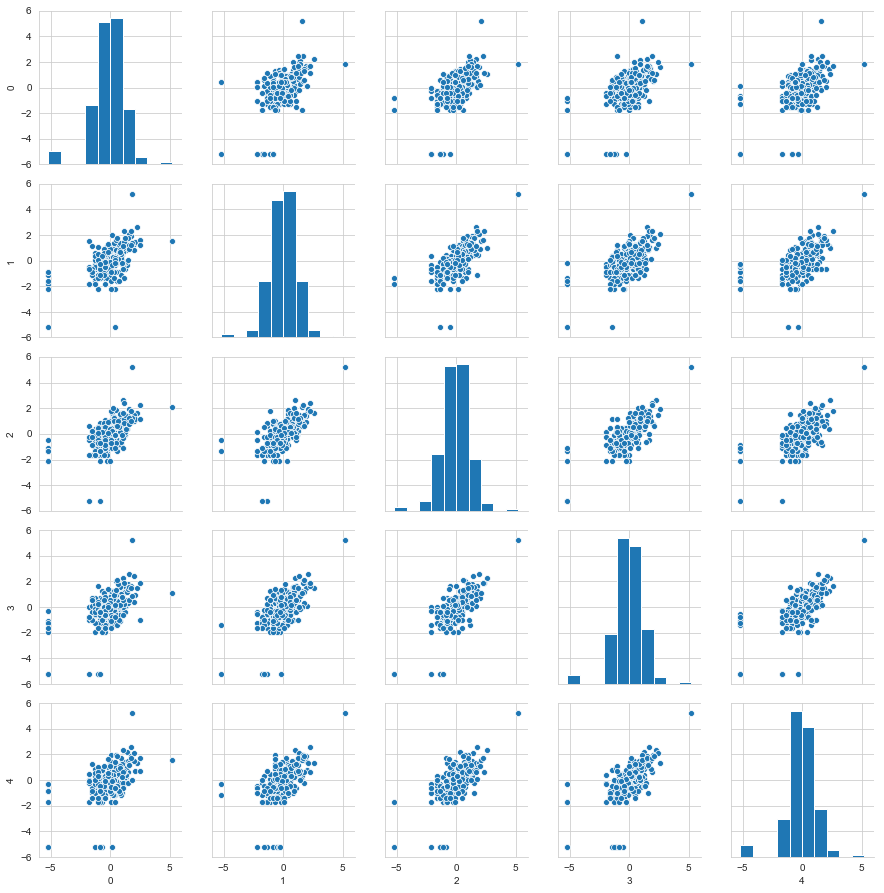

In [1738]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
y_train_scaled_df = pd.DataFrame(y_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
y_test_scaled_df = pd.DataFrame(y_test_scaled)
sns.pairplot(X_train_scaled_df)
print(len(X_train_scaled_df))

In [1774]:
def second_model():
    model = keras.Sequential([
        layers.Dense(3,activation=tf.nn.relu, input_shape=[len(X_train_scaled_df.keys())]),
        #layers.Dense(2,activation=tf.nn.sigmoid),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [1775]:
model = second_model()

In [1776]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_339 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_340 (Dense)            (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....

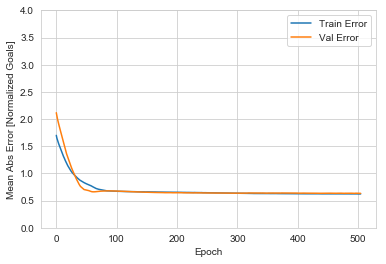

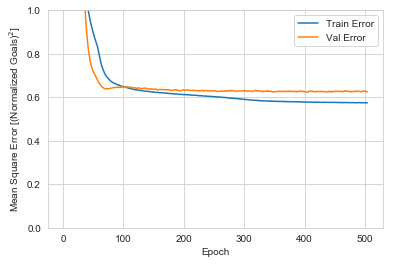

In [1777]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train_scaled_df, y_train_scaled_df, epochs=EPOCHS*10,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [1778]:
loss, mae, mse = model.evaluate(X_test_scaled_df, y_test_scaled_df)

58/58 [==============================] - 0s 97us/step


In [1779]:
print("Testing set Mean Abs Error: {:5.2f} Normalized Goals".format(mae))
print("Testing set Mean Squared Error: {:5.2f} (Normalized Goals)^2".format(mse))

Testing set Mean Abs Error:  0.62 Normalized Goals
Testing set Mean Squared Error:  0.57 (Normalized Goals)^2


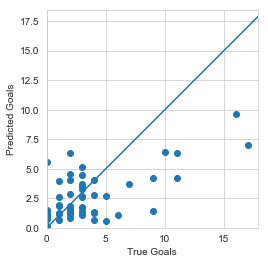

In [1780]:
test_predictions = model.predict(X_test_scaled_df).flatten()

plt.scatter(y_scaler.inverse_transform(np.array(y_test_scaled_df).reshape(-1, 1)), y_scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1)))
plt.xlabel('True Goals')
plt.ylabel('Predicted Goals')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [1781]:
from sklearn import linear_model

In [1782]:
regr = linear_model.LinearRegression()

In [1783]:
regr.fit(X_train_scaled_df, y_train_scaled_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1784]:
regr_y_pred = regr.predict(X_test_scaled_df)

In [1785]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1786]:
print("Regression Mean Squared Error: {:5.2f} (Normalized Goals)^2".format(mean_squared_error(y_test_scaled_df, regr_y_pred)))
print("Regression Mean Absolute Error: {:5.2f} (Normalized Goals)^2".format(mean_absolute_error(y_test_scaled_df, regr_y_pred)))

Regression Mean Squared Error:  0.64 (Normalized Goals)^2
Regression Mean Absolute Error:  0.63 (Normalized Goals)^2


In [1787]:
print("NN Mean Squared Error: {:5.2f} (Normalized Goals)^2".format(mse))
print("NN Mean Abs Error: {:5.2f} Normalized Goals".format(mae))

NN Mean Squared Error:  0.57 (Normalized Goals)^2
NN Mean Abs Error:  0.62 Normalized Goals


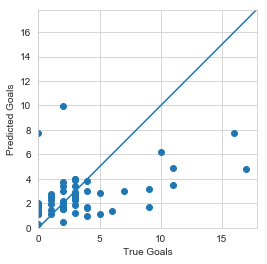

In [1788]:
plt.scatter(y_scaler.inverse_transform(np.array(y_test_scaled_df).reshape(-1, 1)), y_scaler.inverse_transform(np.array(regr_y_pred).reshape(-1, 1)))
plt.xlabel('True Goals')
plt.ylabel('Predicted Goals')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [1789]:
print('Regression Variance score: %.2f' % r2_score(y_scaler.inverse_transform(np.array(y_test_scaled_df).reshape(-1, 1)), y_scaler.inverse_transform(np.array(regr_y_pred).reshape(-1, 1))))

Regression Variance score: 0.17


In [1790]:
print('NN Variance score: %.2f' % r2_score(y_scaler.inverse_transform(np.array(y_test_scaled_df).reshape(-1, 1)), y_scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))))

NN Variance score: 0.38


In [1791]:
Good_FWs

nationality            player   age  goals  games_pl  assists  \
1            eng   Chris Armstrong  21.0   15.0      35.0      1.0   
2            eng   Chris Armstrong  23.0    8.0      40.0      3.0   
3            eng   Chris Armstrong  24.0   15.0      35.0      6.0   
4            eng   Chris Armstrong  25.0    5.0      12.0      1.0   
5            eng   Chris Armstrong  26.0    5.0      19.0      0.0   
6            eng   Chris Armstrong  27.0    8.0      34.0      2.0   
7            eng   Chris Armstrong  28.0   14.0      31.0      1.0   
14           eng       John Salako  23.0    0.0      13.0      6.0   
15           eng       John Salako  25.0    4.0      39.0      4.0   
16           eng       John Salako  26.0    3.0      37.0      8.0   
17           eng       John Salako  27.0    1.0      24.0      3.0   
18           eng       John Salako  28.0    0.0      18.0      2.0   
19           eng       John Salako  31.0    0.0      16.0      1.0   
25           eng      Chris Sutton  19.0    8.0      38.0      3.0   
26           eng      Chris Sutton  20.0   25.0      41.0     17.0   
27           eng      Chris Sutton  21.0   15.0      40.0     16.0   
28           eng      Chris Sutton  23.0   11.0      25.0      3.0   
29           eng      Chris Sutton  24.0   18.0      35.0      8.0   
30            ms          Ruel Fox  24.0    4.0      34.0      8.0   
31            ms          Ruel Fox  25.0    2.0      14.0      0.0   
32            ms          Ruel Fox  26.0   10.0      40.0     14.0   
33            ms          Ruel Fox  27.0    6.0      30.0      4.0   
34            ms          Ruel Fox  28.0    1.0      25.0      3.0   
35            ms          Ruel Fox  29.0    3.0      32.0      7.0   
36            ms          Ruel Fox  30.0    3.0      20.0      0.0   
49           eng       Mike Newell  27.0   13.0      40.0      5.0   
50           eng       Mike Newell  28.0    6.0      28.0      5.0   
51           eng       Mike Newell  30.0    3.0      30.0      7.0   
52           eng       Mike Newell  31.0    0.0       7.0      1.0   
53           eng     Stuart Ripley  24.0    7.0      40.0      7.0   
...          ...               ...   ...    ...       ...      ...   
5801         eng    Saido Berahino  21.0    4.0      31.0      0.0   
5802         eng    Saido Berahino  23.0    0.0      15.0      1.0   
5833          es     Ander Herrera  24.0    6.0      26.0      4.0   
5834          es     Ander Herrera  25.0    3.0      27.0      2.0   
5835          es     Ander Herrera  26.0    1.0      31.0      5.0   
5836          es     Ander Herrera  27.0    0.0      26.0      2.0   
5847         eng       Tom Carroll  22.0    0.0      13.0      0.0   
5848         eng       Tom Carroll  23.0    1.0      19.0      0.0   
5849         eng       Tom Carroll  24.0    1.0      17.0      2.0   
5850         eng       Tom Carroll  25.0    0.0      37.0      4.0   
5920          rs       Dušan Tadić  25.0    4.0      31.0      8.0   
5921          rs       Dušan Tadić  26.0    8.0      34.0     12.0   
5922          rs       Dušan Tadić  27.0    3.0      33.0      5.0   
5923          rs       Dušan Tadić  28.0    6.0      36.0      3.0   
5941         eng       Jamie Vardy  27.0    5.0      34.0      8.0   
5942         eng       Jamie Vardy  28.0   24.0      36.0      6.0   
5943         eng       Jamie Vardy  29.0   13.0      35.0      4.0   
5944         eng       Jamie Vardy  30.0   20.0      37.0      1.0   
5945          dz      Riyad Mahrez  23.0    4.0      30.0      3.0   
5946          dz      Riyad Mahrez  24.0   17.0      37.0     11.0   
5947          dz      Riyad Mahrez  25.0    6.0      36.0      4.0   
5948          dz      Riyad Mahrez  26.0   12.0      36.0     10.0   
5951         eng  Danny Drinkwater  24.0    0.0      23.0      0.0   
5952         eng  Danny Drinkwater  25.0    3.0      35.0      7.0   
5953         eng  Danny Drinkwater  26.0    1.0      29.0      2.0   
5954         en

In [1842]:
df_all_new = Good_FWs.assign(id=(Good_FWs['player'] + '_' + Good_FWs['nationality']).astype('category').cat.codes)

In [1843]:
df_id_only = df_all_new.drop(['player','nationality'],axis=1)

In [1844]:
df_id_only

age  goals  games_pl  assists  minutes_pl  shots_on_target  season  \
1     21.0   15.0      35.0      1.0      3104.0             37.0    1992   
2     23.0    8.0      40.0      3.0      3586.0             28.0    1994   
3     24.0   15.0      35.0      6.0      3105.0             41.0    1995   
4     25.0    5.0      12.0      1.0       974.0             15.0    1996   
5     26.0    5.0      19.0      0.0      1284.0             14.0    1997   
6     27.0    8.0      34.0      2.0      2382.0             25.0    1998   
7     28.0   14.0      31.0      1.0      2513.0             33.0    1999   
14    23.0    0.0      13.0      6.0      1090.0              7.0    1992   
15    25.0    4.0      39.0      4.0      3284.0             22.0    1994   
16    26.0    3.0      37.0      8.0      3072.0             18.0    1995   
17    27.0    1.0      24.0      3.0      2109.0             12.0    1996   
18    28.0    0.0      18.0      2.0      1122.0              8.0    1997   
19    31.0    0.0      16.0      1.0       453.0              1.0    2000   
25    19.0    8.0      38.0      3.0      2944.0             26.0    1992   
26    20.0   25.0      41.0     17.0      3680.0             68.0    1993   
27    21.0   15.0      40.0     16.0      3520.0             44.0    1994   
28    23.0   11.0      25.0      3.0      2032.0             35.0    1996   
29    24.0   18.0      35.0      8.0      3099.0             58.0    1997   
30    24.0    4.0      34.0      8.0      2884.0             18.0    1992   
31    25.0    2.0      14.0      0.0      1240.0              NaN    1993   
32    26.0   10.0      40.0     14.0      3485.0             26.0    1994   
33    27.0    6.0      30.0      4.0      2503.0             20.0    1995   
34    28.0    1.0      25.0      3.0      1796.0             13.0    1996   
35    29.0    3.0      32.0      7.0      2706.0             11.0    1997   
36    30.0    3.0      20.0      0.0      1512.0             10.0    1998   
49    27.0   13.0      40.0      5.0      3504.0             39.0    1992   
50    28.0    6.0      28.0      5.0      2278.0             24.0    1993   
51    30.0    3.0      30.0      7.0      2118.0             19.0    1995   
52    31.0    0.0       7.0      1.0       536.0              5.0    1996   
53    24.0    7.0      40.0      7.0      3502.0             26.0    1992   
...    ...    ...       ...      ...         ...              ...     ...   
5801  21.0    4.0      31.0      0.0      1746.0             12.0    2015   
5802  23.0    0.0      15.0      1.0       494.0              4.0    2017   
5833  24.0    6.0      26.0      4.0      1870.0              7.0    2014   
5834  25.0    3.0      27.0      2.0      1532.0              6.0    2015   
5835  26.0    1.0      31.0      5.0      2464.0              5.0    2016   
5836  27.0    0.0      26.0      2.0      1268.0              1.0    2017   
5847  22.0    0.0      13.0      0.0       692.0              0.0    2014   
5848  23.0    1.0      19.0      0.0       515.0              3.0    2015   
5849  24.0    1.0      17.0      2.0      1387.0              3.0    2016   
5850  25.0    0.0      37.0      4.0      2570.0              3.0    2017   
5920  25.0    4.0      31.0      8.0      2056.0             21.0    2014   
5921  26.0    8.0      34.0     12.0      2279.0             16.0    2015   
5922  27.0    3.0      33.0      5.0      2411.0             22.0    2016   
5923  28.0    6.0      36.0      3.0      2791.0             16.0    2017   
5941  27.0    5.0      34.0      8.0      2241.0             24.0    2014   
5942  28.0   24.0      36.0      6.0      3133.0             53.0    2015   
5943  29.0   13.0      35.0      4.0      2802.0             26.0    2016   
5944  30.0   20.0      37.0      1.0      3247.0             35.0    2017   
5945  23.0    4.0      30.0      3.0      2079.0             24.0    2014   
5946  24.0   17.0      37.0     11.0      3034.0             39.0    2015   
594

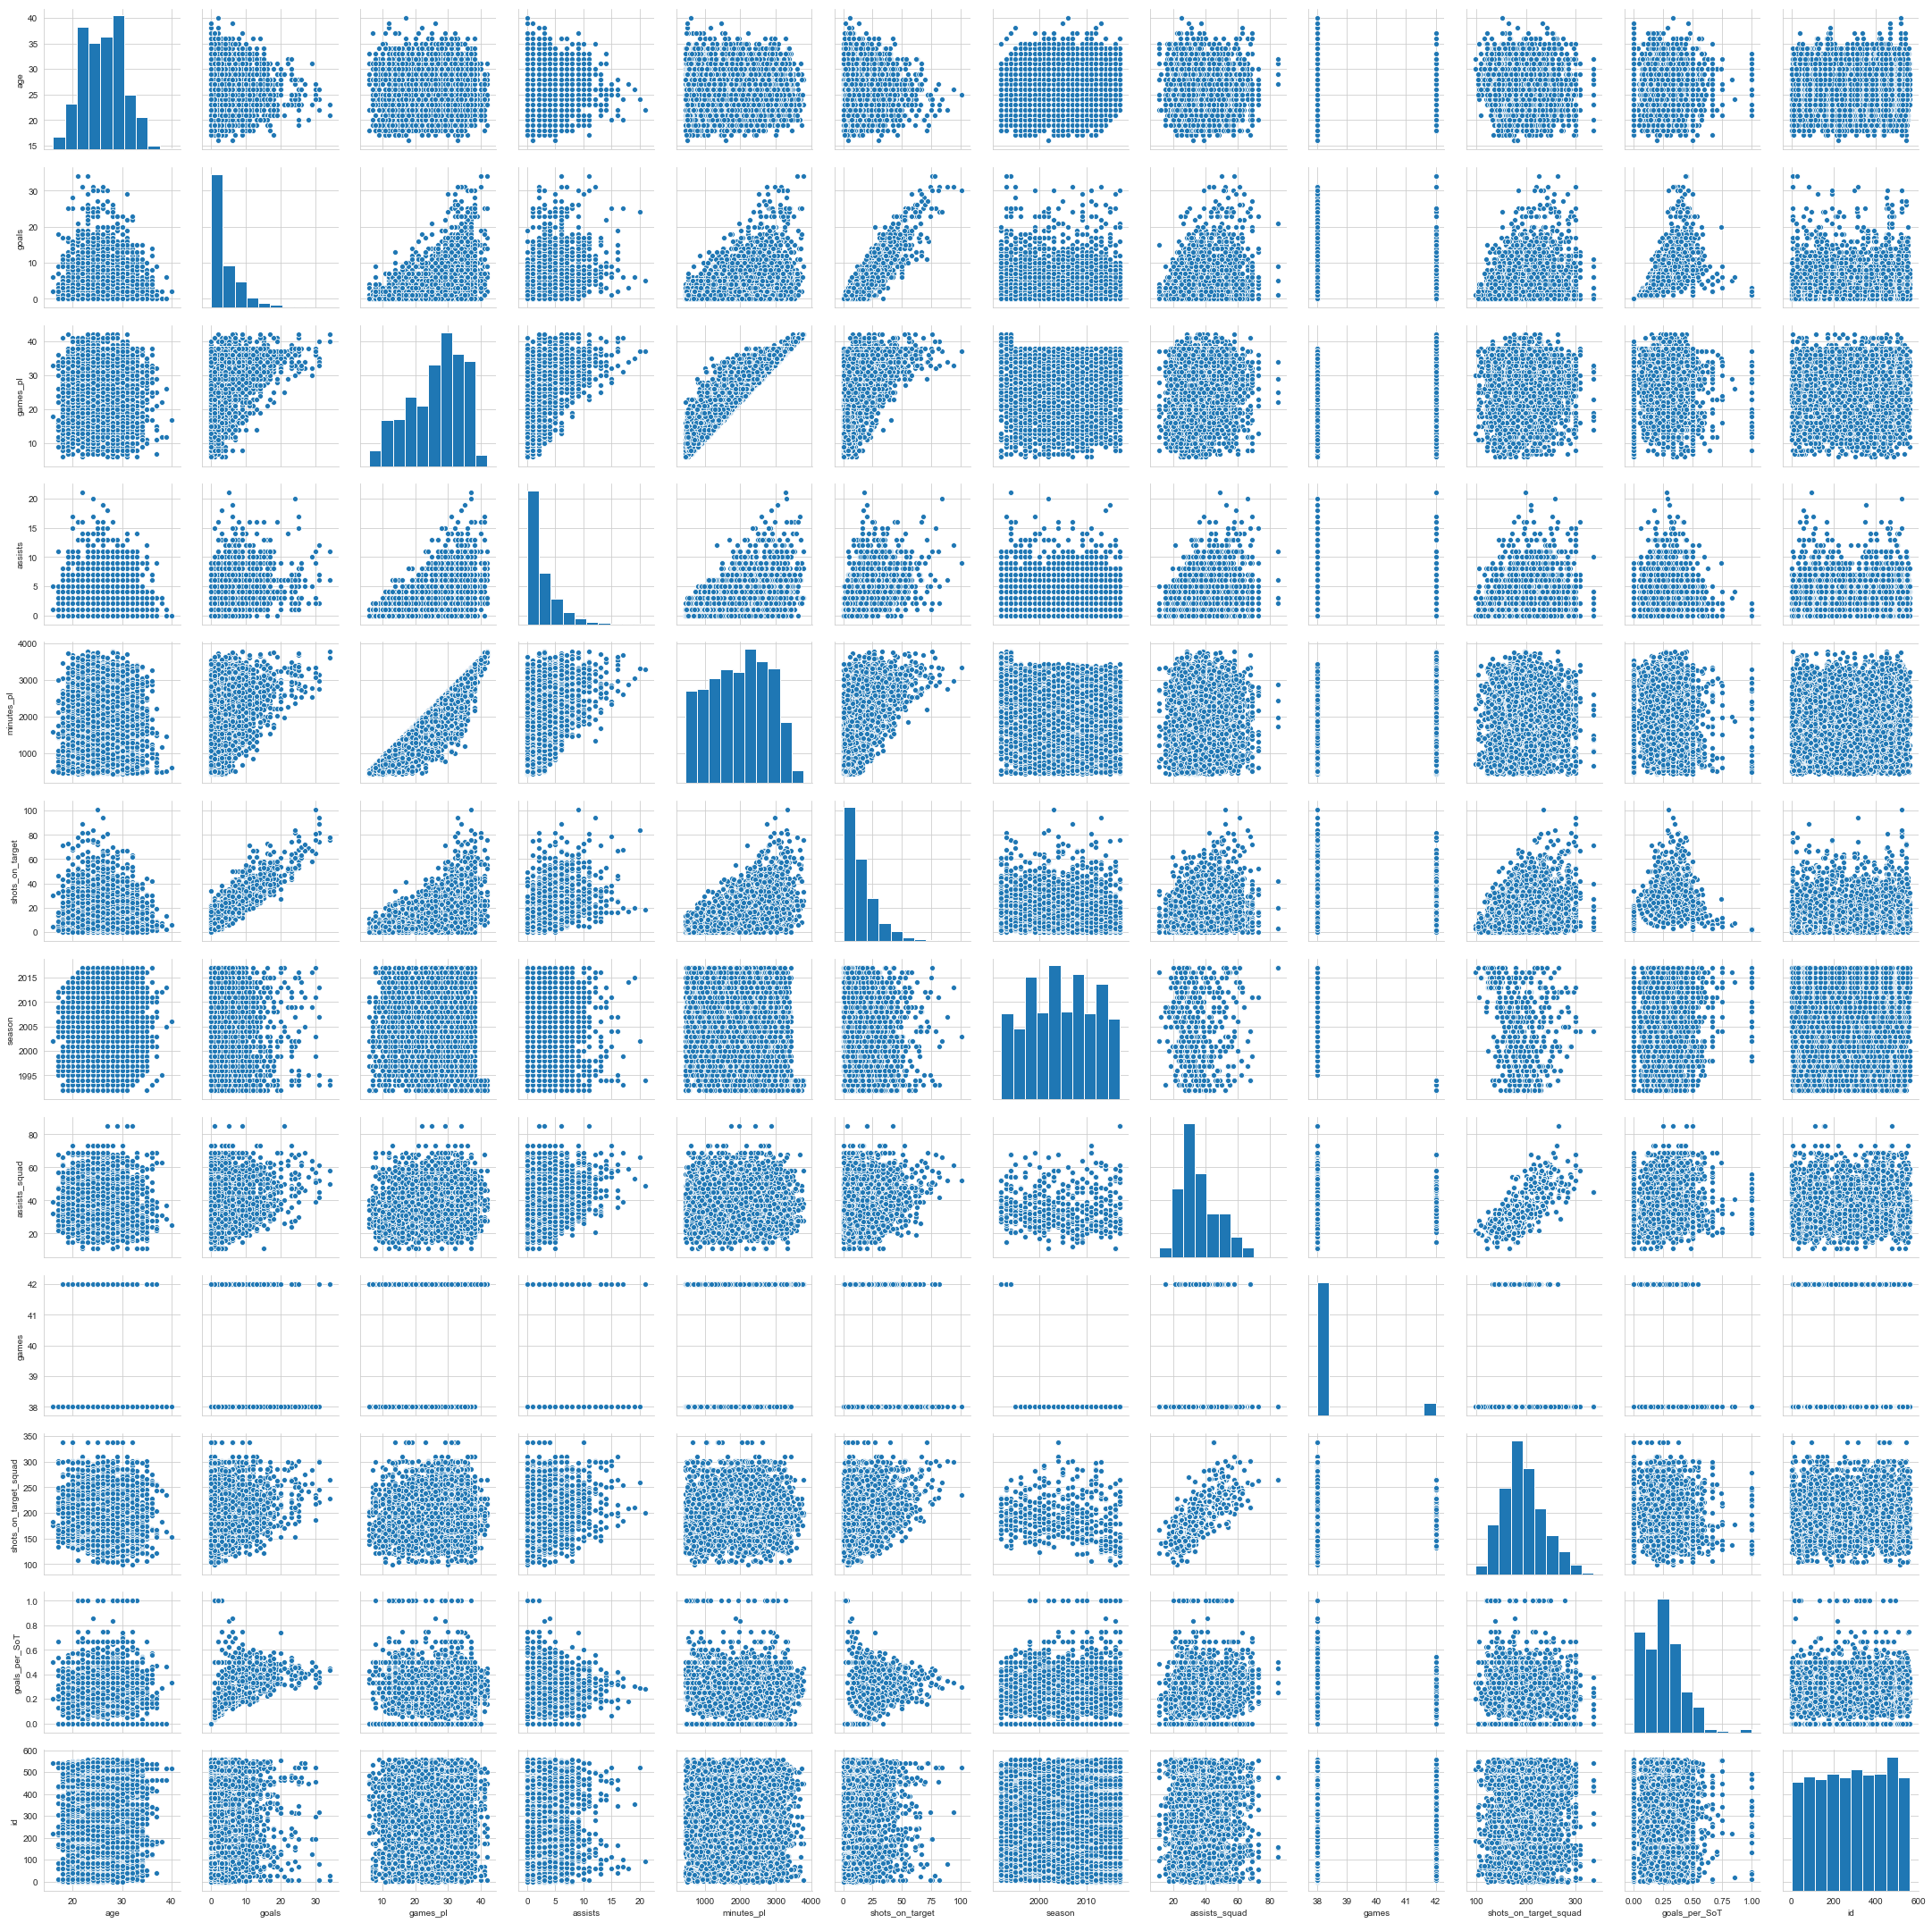

In [1845]:
sns.pairplot(df_id_only)

In [1846]:
temp_id_df = []
for one_id in df_id_only['id'].unique():
    oneID = df_id_only[df_id_only['id'] == one_id]
    season_min = oneID['season'].min()
    temp_id_df.append([one_id,season_min])

In [1847]:
temp_id_df = pd.DataFrame(temp_id_df)
temp_id_df['id'] = temp_id_df[0]
temp_id_df = temp_id_df.drop(0,axis=1)

In [1848]:
df_id_only = df_id_only.merge(temp_id_df)

In [1849]:
df_id_only.head()

age  goals  games_pl  assists  minutes_pl  shots_on_target  season  \
0  21.0   15.0      35.0      1.0      3104.0             37.0    1992   
1  23.0    8.0      40.0      3.0      3586.0             28.0    1994   
2  24.0   15.0      35.0      6.0      3105.0             41.0    1995   
3  25.0    5.0      12.0      1.0       974.0             15.0    1996   
4  26.0    5.0      19.0      0.0      1284.0             14.0    1997   

   assists_squad  games  shots_on_target_squad  goals_per_SoT  id     1  
0             30     42                    160       0.405405  62  1992  
1             22     42                    132       0.285714  62  1992  
2             38     38                    181       0.365854  62  1992  
3             32     38                    191       0.333333  62  1992  
4             39     38                    208       0.357143  62  1992

In [1850]:
df_id_only['season_num'] = df_id_only['season'] - df_id_only[1]

In [1851]:
df_id_only = df_id_only.drop(1,axis=1)

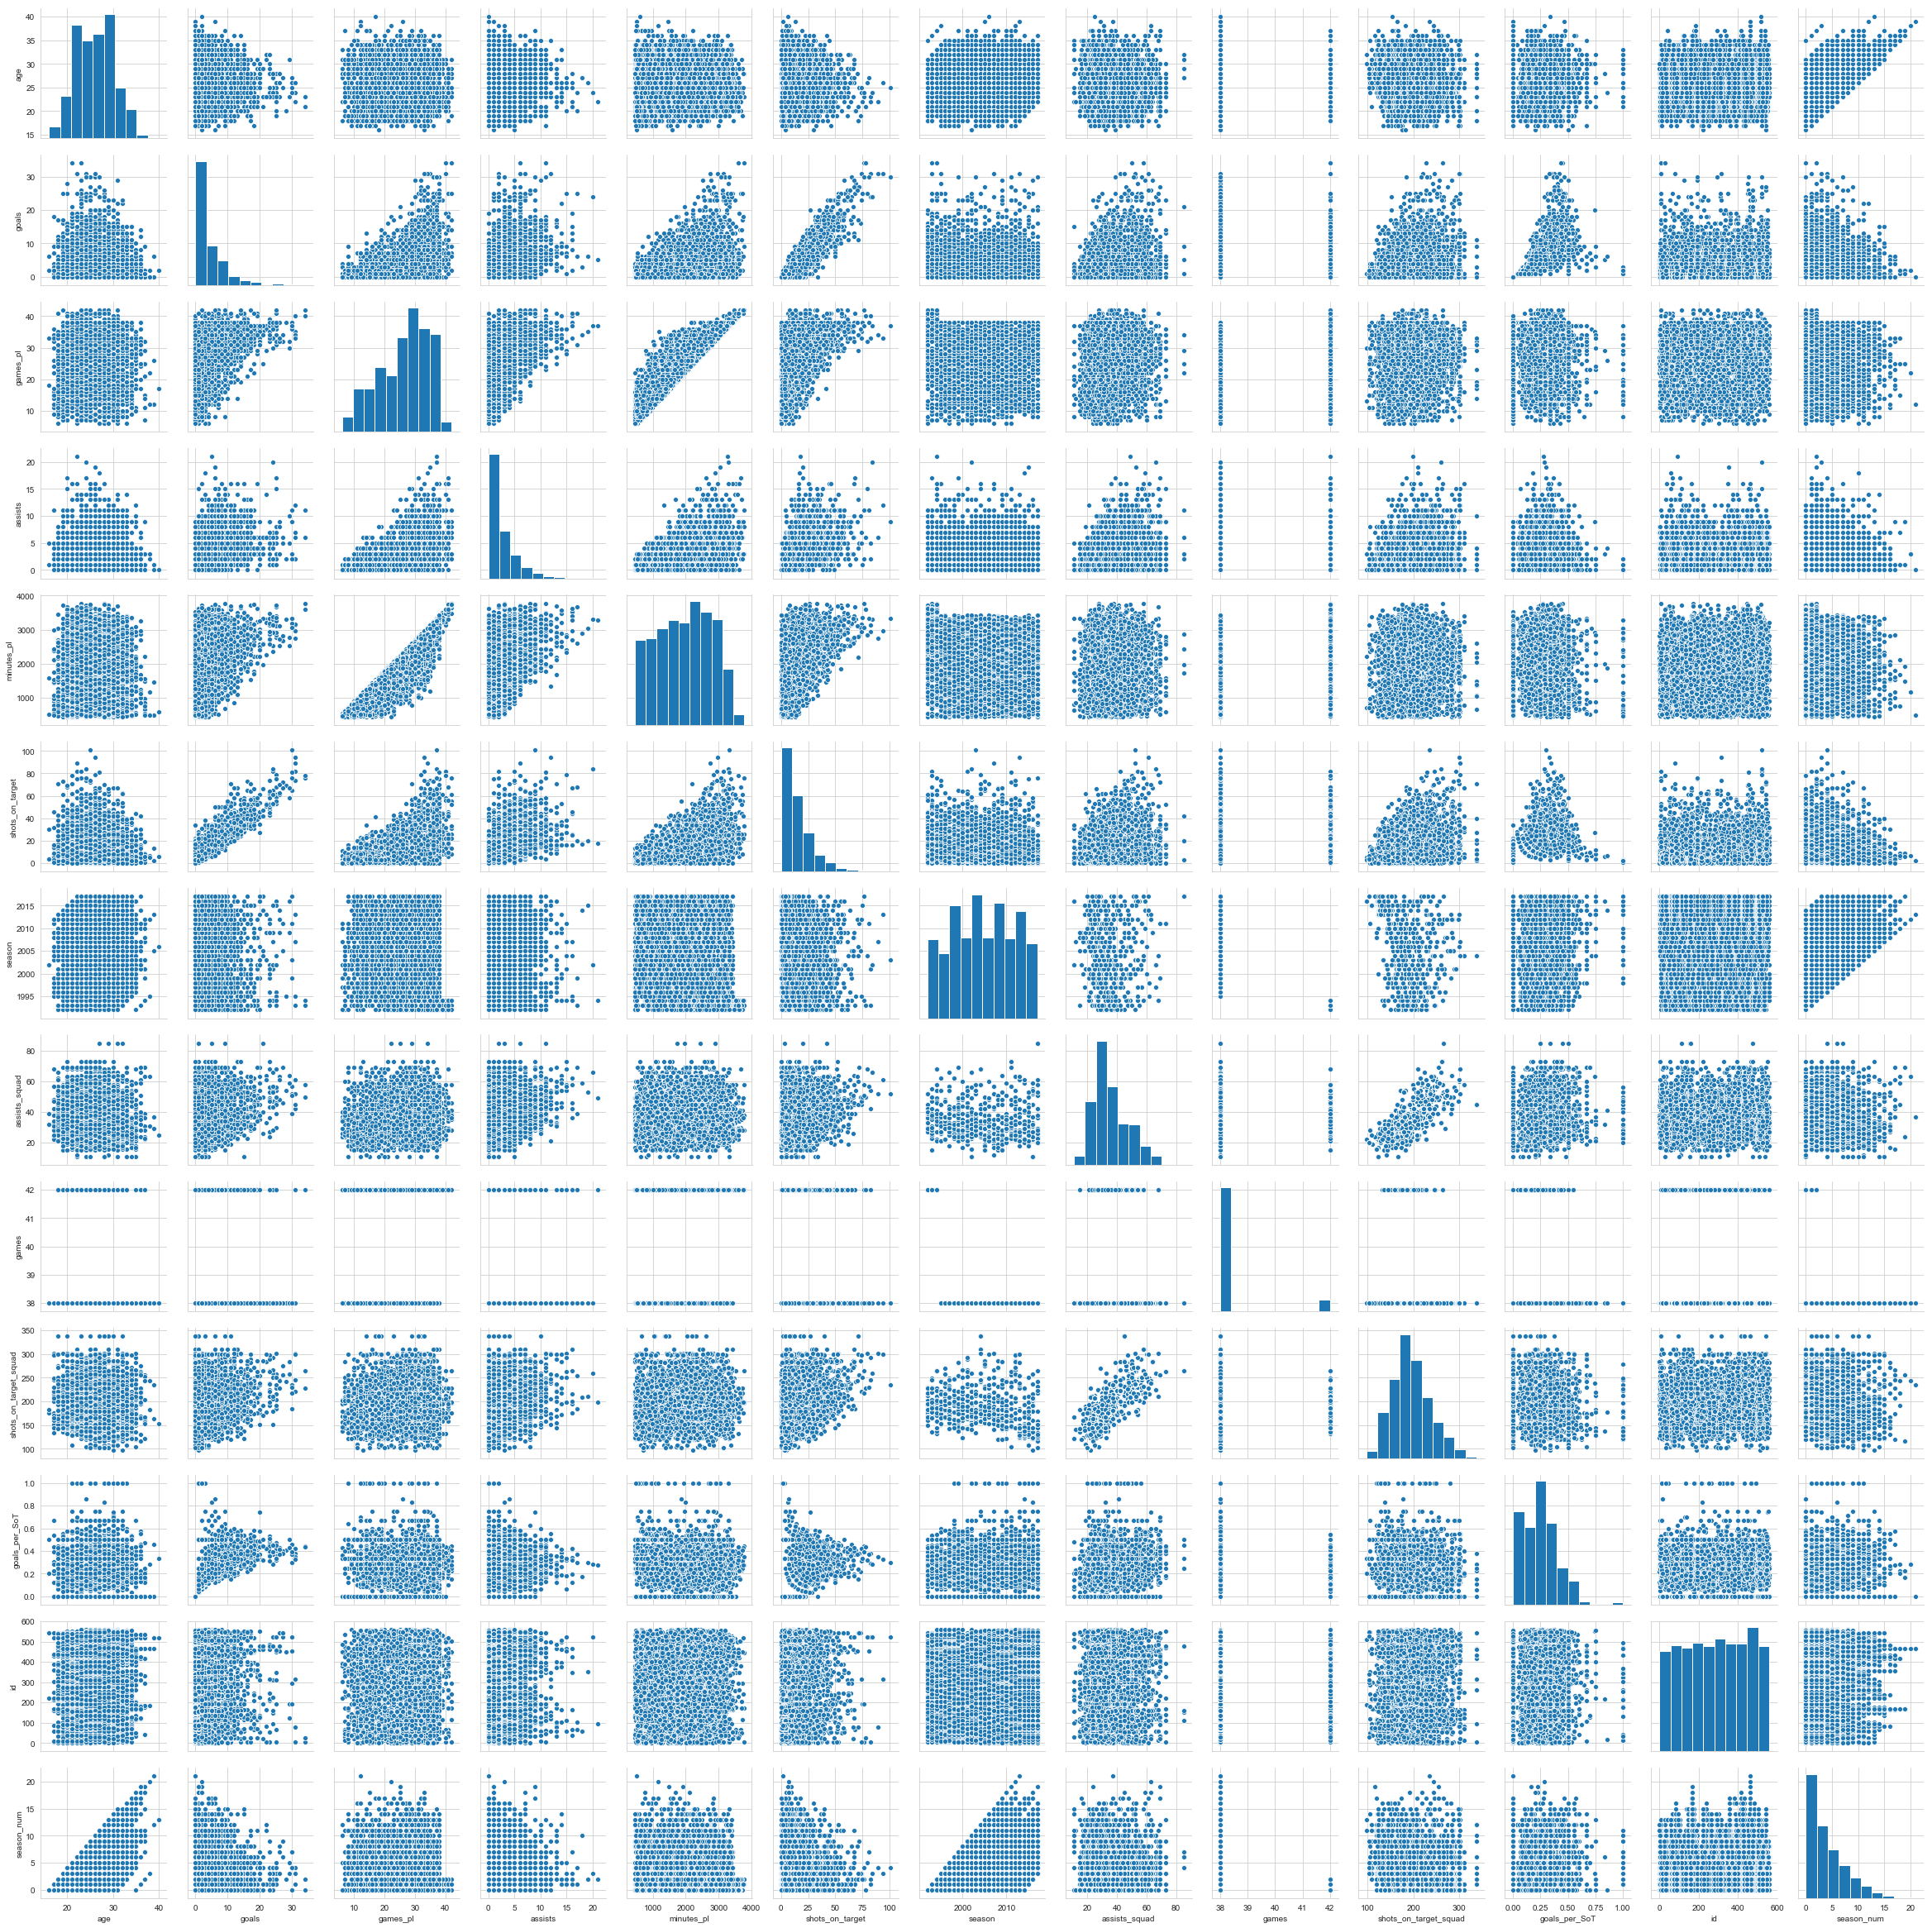

In [1852]:
sns.pairplot(df_id_only)

In [1853]:
df_id_only_v2 = df_id_only.assign(id_2=(df_id_only['games']).astype('category').cat.codes)

In [1854]:
df_id_only_v2.head()

age  goals  games_pl  assists  minutes_pl  shots_on_target  season  \
0  21.0   15.0      35.0      1.0      3104.0             37.0    1992   
1  23.0    8.0      40.0      3.0      3586.0             28.0    1994   
2  24.0   15.0      35.0      6.0      3105.0             41.0    1995   
3  25.0    5.0      12.0      1.0       974.0             15.0    1996   
4  26.0    5.0      19.0      0.0      1284.0             14.0    1997   

   assists_squad  games  shots_on_target_squad  goals_per_SoT  id  season_num  \
0             30     42                    160       0.405405  62           0   
1             22     42                    132       0.285714  62           2   
2             38     38                    181       0.365854  62           3   
3             32     38                    191       0.333333  62           4   
4             39     38                    208       0.357143  62           5   

   id_2  
0     1  
1     1  
2     0  
3     0  
4     0

In [1856]:
df_id_only_v2 = df_id_only_v2.drop('games',axis=1)

In [1858]:
df_id_only_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 0 to 3844
Data columns (total 13 columns):
age                      3845 non-null float64
goals                    3844 non-null float64
games_pl                 3845 non-null float64
assists                  3825 non-null float64
minutes_pl               3845 non-null float64
shots_on_target          3823 non-null float64
season                   3845 non-null int64
assists_squad            3845 non-null int64
shots_on_target_squad    3845 non-null int64
goals_per_SoT            3732 non-null float64
id                       3845 non-null int16
season_num               3845 non-null int64
id_2                     3845 non-null int8
dtypes: float64(7), int16(1), int64(4), int8(1)
memory usage: 371.7 KB


In [1860]:
df_id_only_v2 = df_id_only_v2.dropna()

In [1861]:
df_id_only_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 3844
Data columns (total 13 columns):
age                      3730 non-null float64
goals                    3730 non-null float64
games_pl                 3730 non-null float64
assists                  3730 non-null float64
minutes_pl               3730 non-null float64
shots_on_target          3730 non-null float64
season                   3730 non-null int64
assists_squad            3730 non-null int64
shots_on_target_squad    3730 non-null int64
goals_per_SoT            3730 non-null float64
id                       3730 non-null int16
season_num               3730 non-null int64
id_2                     3730 non-null int8
dtypes: float64(7), int16(1), int64(4), int8(1)
memory usage: 360.6 KB
